# Primary Data Analyis
In this notebook the code for the primary data analysis and the generation of the figures for the paper is shared. 

## Setup


### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import numpy as np
import math 

### Parameters

In [2]:
save_figs = True
data_path = '../data/'
fig_path = '../results/'

### Load data
1. `unique_articles.csv` file containing all unique articles indentified along with the methodology, publisher and year of publication.
2. `papers_reviewed_reprod_variables_categoric.csv` file containing all reproducability variables as categrical data
3. `papers_reviewed_reprod_variables_numeric.csv`file containing all reproducability variables as numerical data
4. `score_dimension.csv`file containing the reproducability scores of each of the dimensions D1 to D3 and the degree


In [3]:
unique_articles = pd.read_csv(f'{data_path}unique_articles.csv')
print("Number of unique articles:", len(unique_articles))
unique_articles.head(5)


Number of unique articles: 107


,DOI,Publisher,Methodology,Year
0,https://doi.org/10.1109/CCDC.2014.6852414,IEEE,MB+ML,2014
1,https://doi.org/10.1109/ICTAI.2018.00136,IEEE,ML,2018
2,https://doi.org/10.1109/ICVR57957.2023.10169760,IEEE,MB+ML+KB,2023
3,https://doi.org/10.1109/AIKIIE60097.2023.10390401,IEEE,MB+ML,2023
4,https://doi.org/10.1109/ICICT55905.2022.00043,IEEE,MB+ML+KB,2022


In [4]:
data_categoric = pd.read_csv(f'{data_path}papers_reviewed_reprod_variables_categoric.csv', index_col=0)
print("Number of primary studies:", len(data_categoric))
data_categoric.head(5)

Number of primary studies: 65


,DOI,DOI_short,Methodology,Publisher,Year,data_listed,data_metadata,data_stats,data_type,data_access,...,eval_metrics,eval_sig_test,code_link,code_empty,code_preproc,code_features_gen,code_eval,code_params_opt,code_info,code_runable
Paper ID,,,,,,,,,,,,,,,,,,,,,
1,https://doi.org/10.1109/CCDC.2014.6852414,10.1109/CCDC.2014.6852414,MB+ML,IEEE,2014,n,y,n,real-world,No Information,...,"Charts, Error Est.",n,n,na,na,na,na,na,na,na
2,https://doi.org/10.1109/ICTAI.2018.00136,10.1109/ICTAI.2018.00136,ML,IEEE,2018,n,y,n,real-world,proprietary,...,"Precision, Recall",y,n,na,na,na,na,na,na,na
3,https://doi.org/10.1109/ICVR57957.2023.10169760,10.1109/ICVR57957.2023.10169760,MB+ML+KB,IEEE,2023,n,n,n,No Information,No Information,...,Operational KPIs,n,n,na,na,na,na,na,na,na
4,https://doi.org/10.1109/AIKIIE60097.2023.10390401,10.1109/AIKIIE60097.2023.10390401,MB+ML,IEEE,2023,n,n,n,simulation,No Information,...,"Accuracy, F1 score, FPR, TPR",n,n,na,na,na,na,na,na,na
5,https://doi.org/10.1109/ICICT55905.2022.00043,10.1109/ICICT55905.2022.00043,MB+ML+KB,IEEE,2022,n,y,n,"real-world, simulation",No Information,...,"Accuracy, Loss",n,n,na,na,na,na,na,na,na


In [5]:
data_numeric = pd.read_csv(f'{data_path}papers_reviewed_reprod_variables_numeric.csv', index_col=0)
data_numeric.head(5)

,DOI,DOI_short,Methodology,Publisher,Year,data_listed,data_metadata,data_stats,data_type,data_access,...,eval_metrics,eval_sig_test,code_link,code_empty,code_preproc,code_features_gen,code_eval,code_params_opt,code_info,code_runable
Paper ID,,,,,,,,,,,,,,,,,,,,,
1,https://doi.org/10.1109/CCDC.2014.6852414,10.1109/CCDC.2014.6852414,MB+ML,IEEE,2014.0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,https://doi.org/10.1109/ICTAI.2018.00136,10.1109/ICTAI.2018.00136,ML,IEEE,2018.0,0,1,0,1,1,...,1,1,0,0,0,0,0,0,0,0
3,https://doi.org/10.1109/ICVR57957.2023.10169760,10.1109/ICVR57957.2023.10169760,MB+ML+KB,IEEE,2023.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,https://doi.org/10.1109/AIKIIE60097.2023.10390401,10.1109/AIKIIE60097.2023.10390401,MB+ML,IEEE,2023.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5,https://doi.org/10.1109/ICICT55905.2022.00043,10.1109/ICICT55905.2022.00043,MB+ML+KB,IEEE,2022.0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
score_dimension = pd.read_csv(f'{data_path}score_dimension.csv', index_col=0)
score_dimension.head(5)

,D1,D2,D3,degree
Paper ID,,,,
1,0.25,0.2,0.333333,0.294118
2,0.50,0.2,0.333333,0.294118
3,0.00,0.0,0.083333,0.058824
4,0.25,0.0,0.083333,0.117647
5,0.25,0.1,0.333333,0.294118


### Category assignment
The variables are assigned to the relevant categories listed in Table 1 of the manuscript.

In [7]:
data = [
    'data_listed', 
    'data_metadata', 
    'data_stats', 
    'data_type', 
    'data_access']
preprocessing = [
    'preproc_data', 
    'preproc_features']
method = [
    'opt_mentioned', 
    'opt_baseline', 
    'opt_procedure', 
    'params_models', 
    'params_baselines',
    'params_best_model', 
    'params_best_baseline']
evaluation = [
    'eval_splitting', 
    'eval_metrics', 
    'eval_sig_test']
code = [
    'code_link', 
    'code_empty', 
    'code_preproc', 
    'code_features_gen', 
    'code_eval',
    'code_params_opt',
    'code_info', 
    'code_runnable']

### Custom graph generation function

In [8]:
def gen_graph_dataset_model_development(data, category, ax, title, subplot_label):
    binary_columns = [col for col in category if data[col].isin(['y', 'n']).all()]
    percentages = [(data[col] == 'y').mean() * 100 for col in binary_columns]
    bars = ax.bar(binary_columns, percentages, color='lightgrey', edgecolor='black')
    # show percentages
    for bar, percent in zip(bars, percentages):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percent:.0f}%', 
                ha='center', va='bottom', fontsize=14, fontweight='bold')
    #title, labels, grid, and ticks
    ax.set_title(title, fontweight='bold', fontsize=16)
    #ax.set_ylabel('Percentage of Articles Documenting Each Variable', fontsize=13, fontweight='bold')
    #ax.set_xlabel('Variables', fontsize=, fontweight='bold')
    ax.set_ylim(0, 100)
    ax.set_yticks(range(0, 101, 10))
    ax.set_yticklabels([f'{i}%' for i in range(0, 101, 10)], fontsize=13)
    ax.tick_params(axis='x', rotation=90, labelsize=16)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    ax.text(0.5, -0.60, f'({subplot_label})', transform=ax.transAxes, 
            ha='center', va='top', fontsize=16, fontweight='bold')
    
    
def gen_graph_dataset_access_type(data, variables, titles, axarr):
    
    subplot_labels = ['a', 'b', 'c', 'd', 'e', 'f'] 
    for i, (ax, var, title) in enumerate(zip(axarr, variables, titles)):
        counts = data[var].value_counts().reindex(sorted(data[var].dropna().unique()), fill_value=0)
        bars = ax.bar(counts.index, counts.values, color='lightgrey', edgecolor='black')
        for bar, count in zip(bars, counts.values):
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(count),
                    ha='center', va='bottom', fontsize=14, fontweight='bold')
        ax.set_title(title, fontsize=16, fontweight='bold')
        if i == 0:
            ax.set_ylabel('Number of Articles', fontsize=14, fontweight='bold')
        else:
            ax.set_yticklabels([]) 
            ax.tick_params(axis='y', length=0)
        ax.set_ylim(0, 55)
        ax.set_yticks(range(0, 55, 5))
        ax.set_yticklabels([f'{i}' for i in range(0, 55, 5)], fontsize=13)
        ax.tick_params(axis='x', rotation=45, labelsize=14)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        
        #subplot label at bottom center
        ax.text(0.5, -0.5, f'({subplot_labels[i]})', transform=ax.transAxes, 
                ha='center', va='top', fontsize=16, fontweight='bold')

def gen_graph_eval_splitting_type_distribution(data, path_out='eval_splitting.pdf', save=False):

    fig, ax = plt.subplots(1, 1, figsize=(12, 6))    
    counts = data['eval_splitting'].value_counts()
    
    bars = ax.bar(range(len(counts)), counts.values, color='lightgrey', edgecolor='black')
    

    for bar, count in zip(bars, counts.values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, 
                str(count), ha='center', va='bottom', 
                fontsize=14, fontweight='bold')

    #ax.set_title('Distribution of Evaluation Splitting Types', fontweight='bold', fontsize=16)
    #ax.set_ylabel('Number of Articles', fontsize=14, fontweight='bold')
    ax.set_xlabel('Splitting Type', fontsize=14, fontweight='bold')
    
    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels(counts.index, rotation=45, ha='right', fontsize=12)
    
    max_count = counts.max()
    ax.set_ylim(0, max_count * 1.1)
    ax.set_yticks(range(0, int(max_count * 1.1) + 1, max(1, int(max_count * 1.1) // 10)))
    ax.tick_params(axis='y', labelsize=12)
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    #ax.text(0.5, -0.2, f'({subplot_label})', transform=ax.transAxes, 
            #ha='center', va='top', fontsize=16, fontweight='bold')
    
    '''print(f"Total articles: {len(data)}")
    print(f"Articles with eval_splitting_type data: {data['eval_splitting'].notna().sum()}")
    print("\nDistribution:")
    for split_type, count in counts.items():
        percentage = (count / len(data)) * 100
        print(f"  {split_type}: {count} articles ({percentage:.1f}%)")'''
    
    plt.tight_layout()
    if save:
        plt.savefig(path_out, format='pdf', bbox_inches='tight')
    plt.show()


def gen_graph_metrics_frequency_plot(df, path_out='metrics_frequency.pdf', save=False):
    
    all_metrics = []
    
    for row in df['eval_metrics']:
        if pd.notna(row) and row.lower() != 'no metrics':
            metrics = [metric.strip() for metric in str(row).split(',')]
            all_metrics.extend(metrics)
    #print(all_metrics)
    metric_counts = Counter(all_metrics)
    
    #remove empty strings if any
    if '' in metric_counts:
        del metric_counts['']
    
    top_metrics = metric_counts.most_common(20)
    metrics = [item[0] for item in top_metrics]
    counts = [item[1] for item in top_metrics]
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    bars = ax.barh(range(len(metrics)), counts, color='lightblue', edgecolor='black', alpha=0.7)
    
    for i, (bar, count) in enumerate(zip(bars, counts)):
        ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                str(count), ha='left', va='center', fontsize=8, fontweight='bold')
    ax.set_title('Frequency of Evaluation Metrics Usage', fontweight='bold', fontsize=12, pad=20)
    ax.set_xlabel('Frequency', fontsize=10, fontweight='bold')
    ax.set_ylabel('Evaluation Metrics', fontsize=10, fontweight='bold')

    ax.set_yticks(range(len(metrics)))
    ax.set_yticklabels(metrics, fontsize=11)
    
    #reverse order
    ax.invert_yaxis()
    
    ax.set_xlim(0, max(counts) * 1.1)

    ax.grid(axis='x', linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    
    if save:
        plt.savefig(path_out, format='pdf', bbox_inches='tight')
    
    plt.show()
    
    #summary statistics
    # print(f"Total number of articles: {len(df)}")
    # print(f"Articles with metrics: {len(df[df['eval_metrics'].str.lower() != 'no metrics'])}")
    # print(f"Total unique metrics found: {len(metric_counts)}")
    # print(f"Total metric mentions: {sum(metric_counts.values())}")
    # print("\nTop 10 most frequent metrics:")
    # for i, (metric, count) in enumerate(top_metrics[:10], 1):
    #     percentage = (count / len(df)) * 100
    #     print(f"{i:2d}. {metric}: {count} times ({percentage:.1f}% of articles)")

def gen_heatmap(numeric_data, title='Reproducibility Variables', xlabel='Reproducibility Variables', save=None):
    plt.figure(figsize=(10, 10))
    sns.heatmap(numeric_data, annot=False, vmin=0, vmax=1, center=0.5, cmap='vlag_r', yticklabels=numeric_data.index)
    plt.yticks(rotation=0)
    plt.xlabel(title)
    plt.title(xlabel)
    plt.tight_layout()
    if save is not None:
        plt.savefig(save)
    plt.show()

In [9]:
# custom function to generate graph
colors = ['lightgrey', 'mintcream', 'honeydew', 'peachpuff', 'lightsalmon', 'aliceblue']
hatches = ['//', '..','o', '--','+', '\\','x']

def plot_stacked_bar(df, path_out='articles_distribution.pdf', save=None):
    grouped = df.groupby(['Year', 'Methodology']).size().unstack(fill_value=0).sort_index()

    fig, ax = plt.subplots(figsize=(10, 6))
    bars = grouped.plot(kind='bar', stacked=True, ax=ax, edgecolor='black', linewidth=1, color='lightgrey')

    for i, bar in enumerate(bars.containers):
        for patch in bar:
            patch.set_facecolor(colors[i % len(colors)])
            patch.set_hatch(hatches[i % len(hatches)])

    ax.set_title('FDD Methodology Types Published between 2014 and 2024', fontweight='bold')
    ax.set_xlabel('Year', fontsize=13)
    ax.set_ylabel('Number of Articles Published', fontsize=13)
    ax.legend(title='Methodology', fontsize=13, title_fontsize=13, frameon=True)
    ax.tick_params(axis='x', rotation=0)

    plt.tight_layout()
    if save:
        plt.savefig(f'{path_out}', format='pdf', bbox_inches='tight')
    plt.show()

## Methodology Distribution
Article Distribution by Methodology and Year of Publication

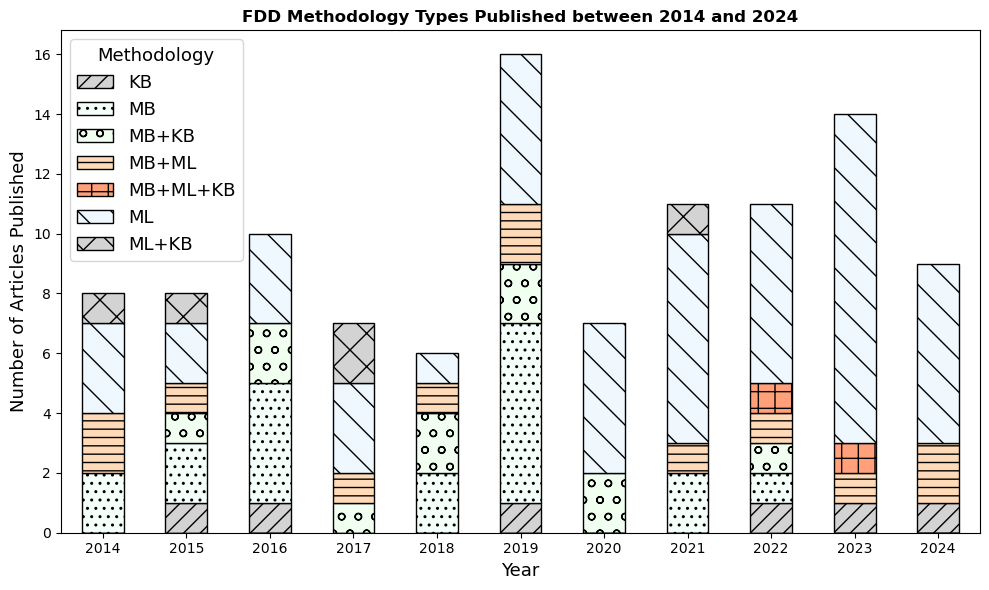

In [10]:
plot_stacked_bar(unique_articles, path_out=f'{fig_path}articles_distribution.pdf', save=save_figs)

### Statistics

In [11]:
stats = unique_articles['Methodology'].value_counts() / len(unique_articles) * 100
stats

Methodology
ML          48.598131
MB          17.757009
MB+ML       11.214953
MB+KB       10.280374
KB           5.607477
ML+KB        4.672897
MB+ML+KB     1.869159
Name: count, dtype: float64

In [12]:
stats_combined = pd.DataFrame({
    'Methodology': ['ML', 'MB', 'MB Hybrid (ML, KB)', 'ML + ML Hybrid(MB, KB)', 'MB+ML+KB', 'KB'],
    'Percentage': [
        stats.get('ML', 0),
        stats.get('MB', 0),
        stats.get('MB+ML', 0) + stats.get('MB+KB', 0),
        stats.get('ML', 0) + stats.get('MB+ML', 0) + stats.get('ML+KB', 0),
        stats.get('MB+ML+KB', 0),
        stats.get('KB', 0) + stats.get('ML+KB', 0)
    ]
})
stats_combined

,Methodology,Percentage
0,ML,48.598131
1,MB,17.757009
2,"MB Hybrid (ML, KB)",21.495327
3,"ML + ML Hybrid(MB, KB)",64.485981
4,MB+ML+KB,1.869159
5,KB,10.280374


## Reproducability Variables Analysis

### Variable documentation percentage

In the following cells, we analyze the reporting of dataset and model development information by visualizing the records as graphical representations.

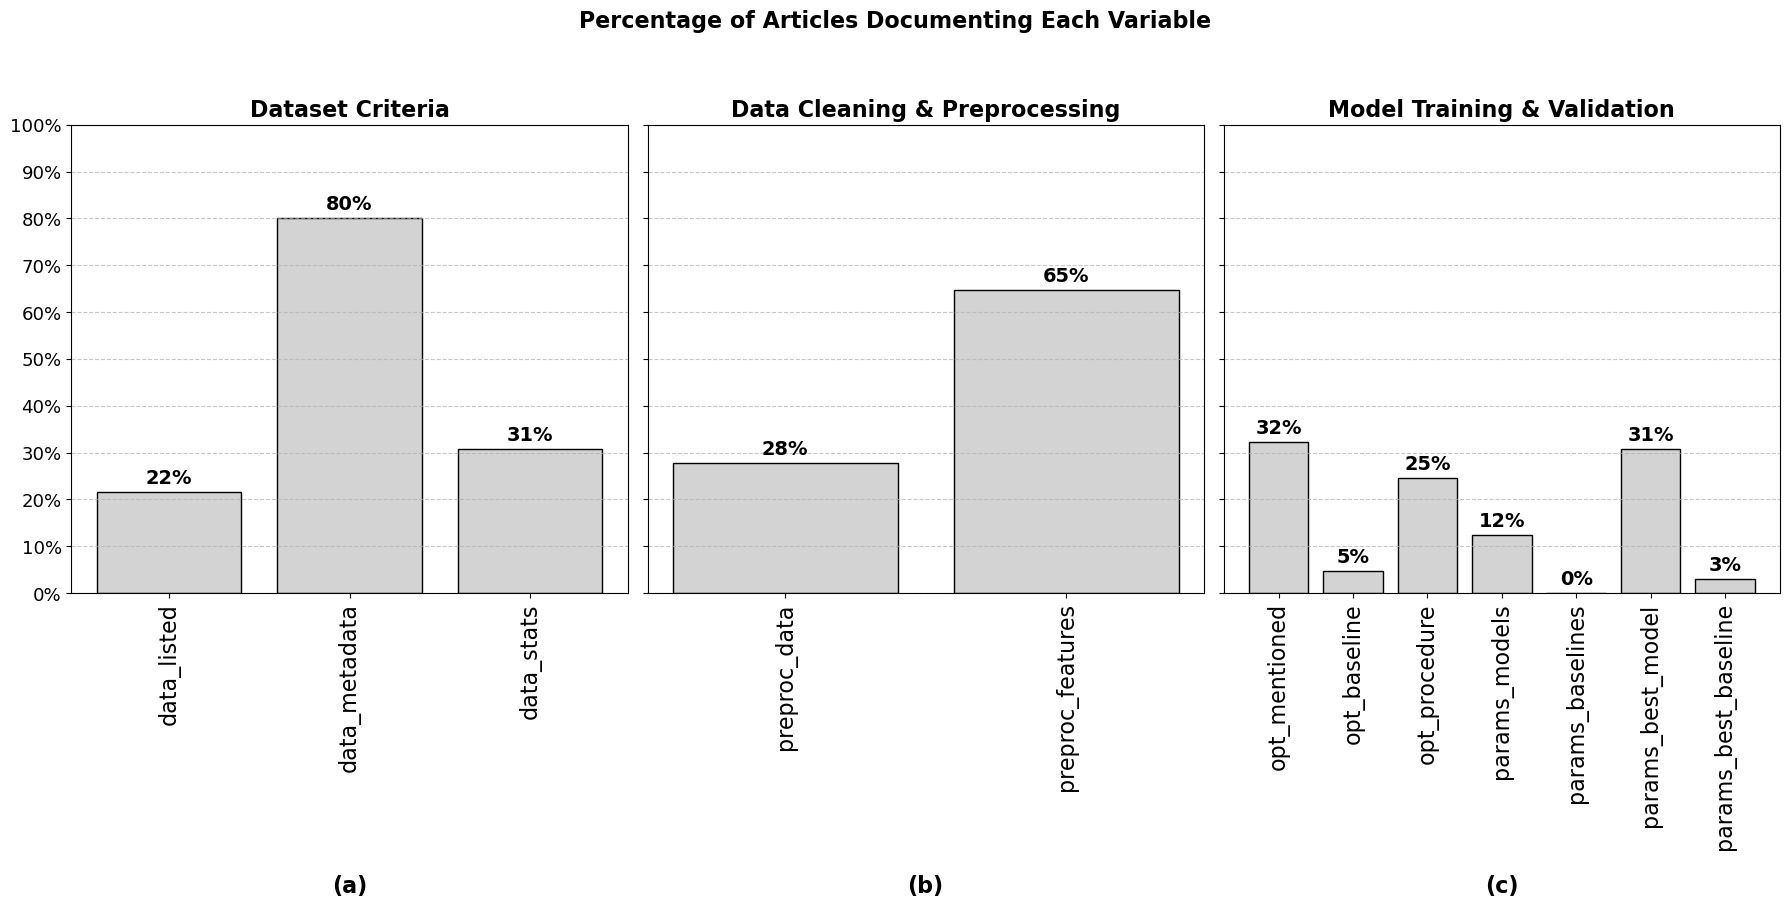

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(18, 12), sharey=True)
gen_graph_dataset_model_development(data_categoric, data, axs[0], 'Dataset Criteria', subplot_label='a')
gen_graph_dataset_model_development(data_categoric, preprocessing, axs[1], 'Data Cleaning & Preprocessing', subplot_label='b')
gen_graph_dataset_model_development(data_categoric, method, axs[2], 'Model Training & Validation', subplot_label='c')
fig.suptitle("Percentage of Articles Documenting Each Variable", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
if save_figs:
    plt.savefig(f'{fig_path}rq1_results.pdf', format='pdf', bbox_inches='tight')

plt.show()

### Categorcal Distribution of data_type & data_acess

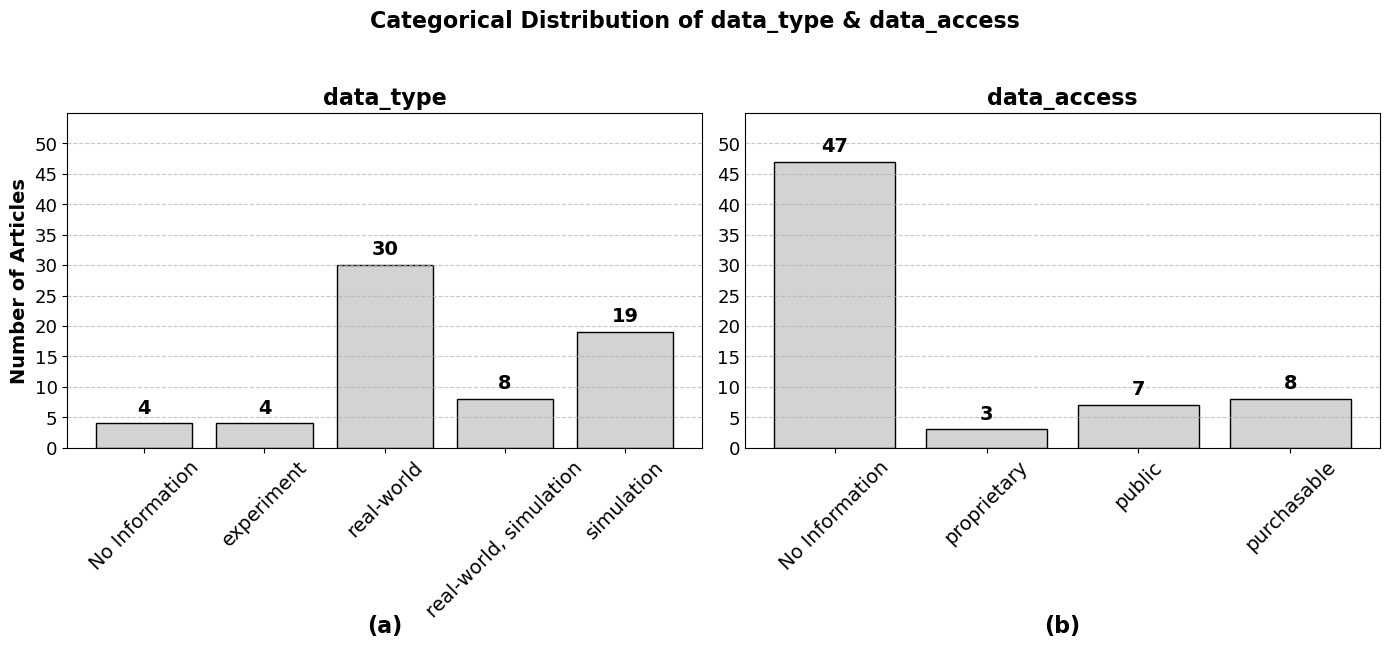

In [14]:
categories = ['data_type', 'data_access']
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

gen_graph_dataset_access_type(data_categoric, categories, categories, axs)

fig.suptitle("Categorical Distribution of data_type & data_access", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
if save_figs:
    plt.savefig(f'{fig_path}rq1_data_type_access_results.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Data Splitting

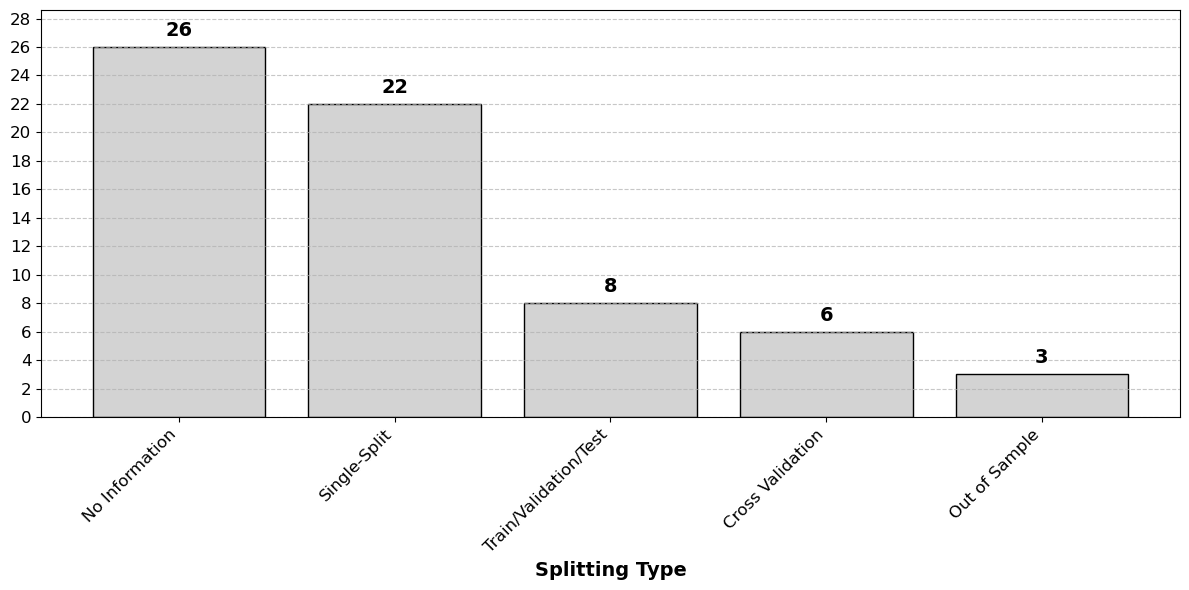

In [15]:
gen_graph_eval_splitting_type_distribution(data_categoric, path_out=f'{fig_path}eval_splitting.pdf', save=save_figs)

### Evaluation Metrics
The following code cell generates a graph showing the distribution of metrics used to evaluate performance.

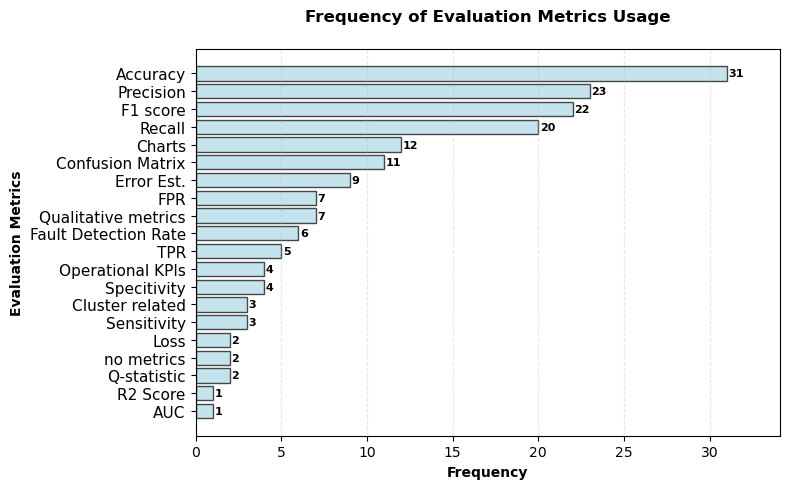

In [16]:
gen_graph_metrics_frequency_plot(data_categoric, path_out=f'{fig_path}metrics_frequency.pdf', save=save_figs)

### Heatmap

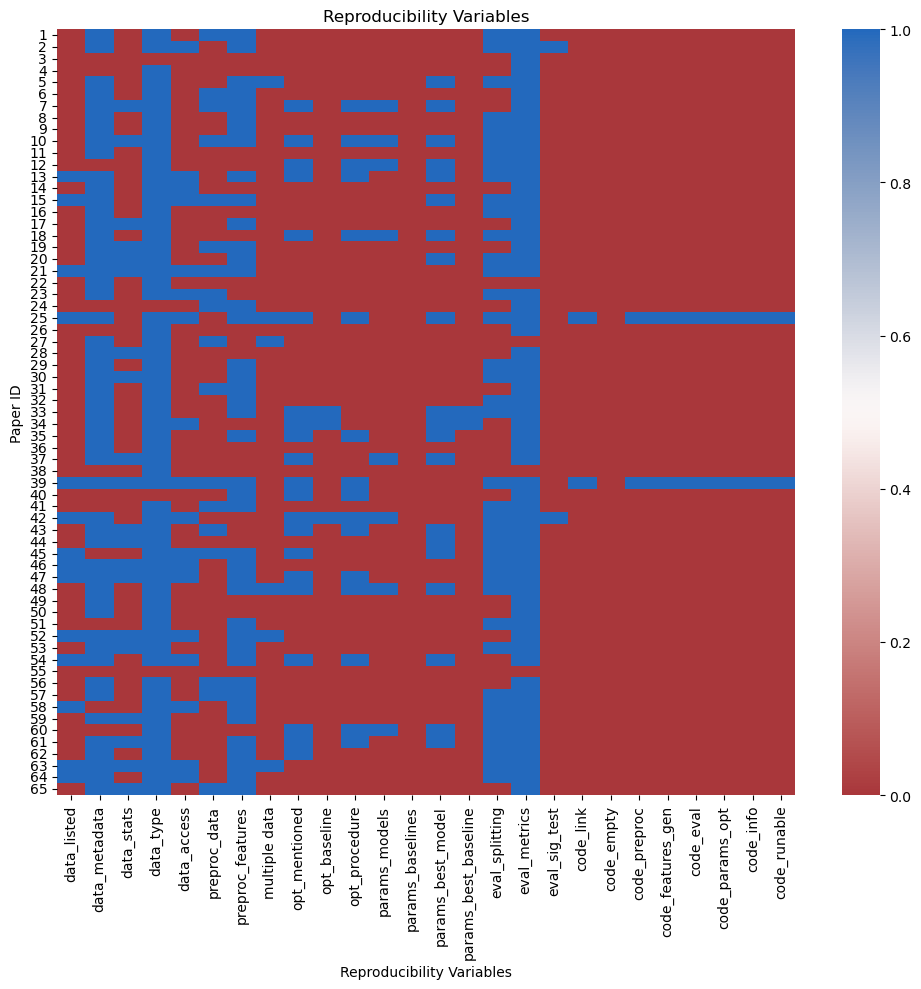

In [17]:
gen_heatmap(data_numeric.drop(columns=["DOI", "DOI_short", "Methodology", "Publisher", "Year"]), title='Reproducibility Variables', xlabel='Reproducibility Variables', save='../results/heatmap_variables.pdf')

## Reproducibility Dimension Analysis

### Radar Plot: Dimensions

In [18]:
# Calcualte the Average Score
scores_dimension_average = score_dimension.mean(axis=0).rename('Average_Score')
scores_dimension_average

D1        0.434615
D2        0.220000
D3        0.284615
degree    0.314932
Name: Average_Score, dtype: float64

/var/folders/yr/bmv5t0h14lq12_vwnprz6frh0000gn/T/ipykernel_32590/2048464877.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_ax.set_yticklabels(scores_dimension_average.index, fontsize=12, fontweight='bold')


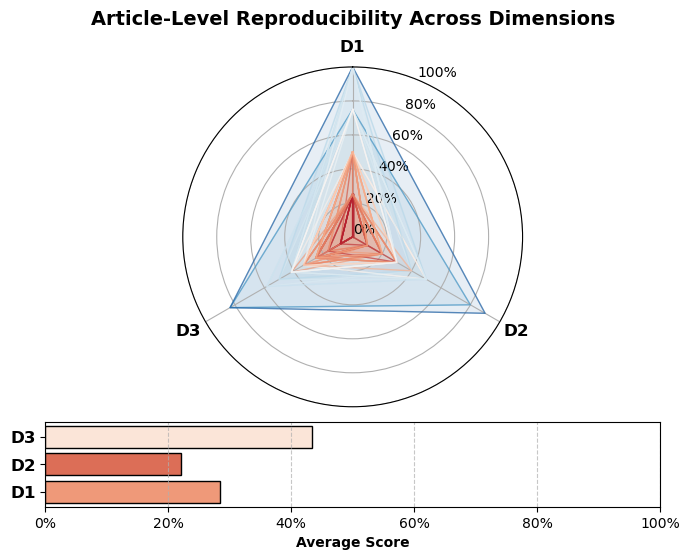

In [19]:
cmap = plt.cm.RdBu 

categories = ['D1', 'D2', 'D3'] #data for radar plot
num_vars = len(categories) 
angles = [n / float(num_vars) * 2 * math.pi for n in range(num_vars)]
angles += angles[:1]  # complete the loop

fig, axs = plt.subplots(2, 1, figsize=(7, 6), gridspec_kw={'height_ratios': [2, 0.5]})
axs[0].axis("off")
radar_ax = fig.add_subplot(211, polar=True)
radar_ax.set_theta_offset(math.pi / 2)

radar_ax.set_theta_direction(-1)
radar_ax.set_xticks(angles[:-1])
radar_ax.set_xticklabels(categories, fontsize=12, fontweight='bold')
radar_ax.set_yticks(np.linspace(0, 1, 6))


radar_ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=10)
radar_ax.set_ylim(0, 1)

for _, row in score_dimension[['D1', 'D2', 'D3']].iterrows():
    values = row.tolist()
    values += values[:1]
    
    # Calculate average score for this article to determine color
    avg_score = np.mean(row.tolist())
    color = cmap(avg_score)
    
    radar_ax.plot(angles, values, color=color, linewidth=1, alpha=0.7)
    radar_ax.fill(angles, values, color=color, alpha=0.1)
    
radar_ax.set_title("Article-Level Reproducibility Across Dimensions", fontsize=14, fontweight='bold', y=1.1)
#horizontal bar chart
bar_ax = axs[1]

#scores to 0-1 range for color mapping
scores_normalized = scores_dimension_average[['D3', 'D2', 'D1']]
colors = [cmap(score) for score in scores_normalized]

bars = bar_ax.barh(
    scores_dimension_average[['D3', 'D2', 'D1']].index, 
    scores_dimension_average[['D3', 'D2', 'D1']].values * 100, 
    color=colors,
    edgecolor='black'
)

bar_ax.set_xlim(0, 100)
bar_ax.set_xticks(np.arange(0, 101, 20))
bar_ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
bar_ax.set_xlabel('Average Score', fontsize=10, fontweight='bold')
bar_ax.set_yticklabels(scores_dimension_average.index, fontsize=12, fontweight='bold')
bar_ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.95])
if save_figs:
    plt.savefig(f'{fig_path}spider_web_dimensions.pdf', format='pdf', bbox_inches='tight')
plt.show()


### Distribution: Reproducablility Degree 

In [20]:
vals = score_dimension['degree'] * 100

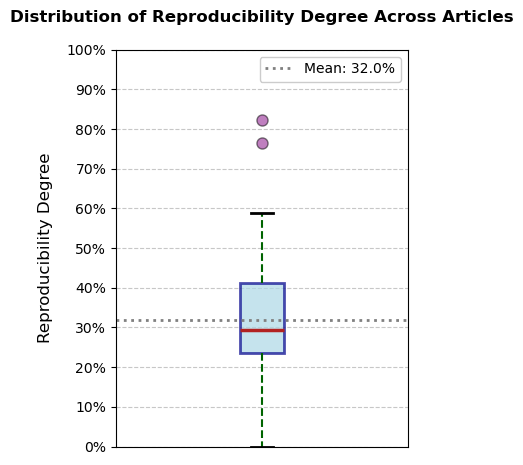

In [21]:
plt.figure(figsize=(4, 5))
boxprops = dict(linestyle='-', linewidth=2, color='darkblue')
whiskerprops = dict(linestyle='--', linewidth=1.5, color='darkgreen')
capprops = dict(linestyle='-', linewidth=2, color='black')
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
flierprops = dict(marker='o', markerfacecolor='purple', markersize=8, 
                 markeredgecolor='black', alpha=0.5)

bp = plt.boxplot(vals, patch_artist=True,
                boxprops=boxprops,
                whiskerprops=whiskerprops,
                capprops=capprops,
                medianprops=medianprops,
                flierprops=flierprops)

for box in bp['boxes']:
    box.set(facecolor='lightblue', alpha=0.7)
    
plt.title('Distribution of Reproducibility Degree Across Articles', 
          fontsize=12, fontweight='bold', pad=20)
plt.ylabel('Reproducibility Degree', fontsize=12, labelpad=10)
plt.xticks([])

plt.yticks(np.arange(0, 101, 10), 
           labels=[f"{i}%" for i in range(0, 101, 10)],
           fontsize=10)
plt.ylim(0, 100) 

plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_val = math.ceil(np.mean(vals))
plt.axhline(y=mean_val, color='grey', linestyle=':', linewidth=2, 
            label=f'Mean: {mean_val:.1f}%')
plt.legend(fontsize=10, framealpha=1, loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.95])
if save_figs:
    plt.savefig(f'{fig_path}reprod_degree_boxplot.pdf', format='pdf', bbox_inches='tight')
plt.show()